# Body Performance

## Download the data
This is a data from kaggle's ["Body Performance"](https://www.kaggle.com/datasets/kukuroo3/body-performance-data), which provide 12 body performance features and a final body class level(A,B,C,D).

In [1]:
import pandas as pd
#read the data
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

## Preprocessing

### Missing Value
Using "missingno matrix" to visualize the missing data location.

You should consider upgrading via the 'c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

<Figure size 504x360 with 0 Axes>

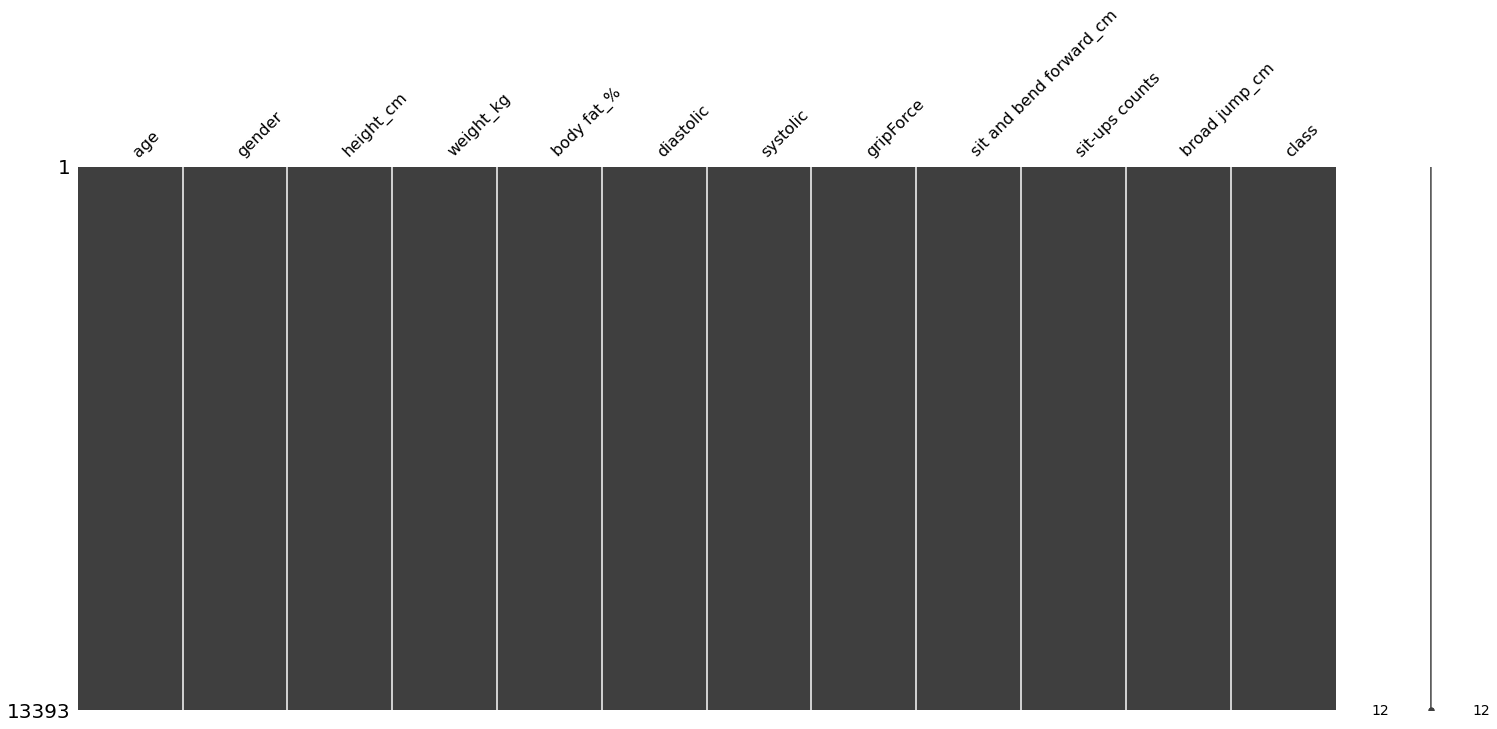

In [2]:
%pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
msno.matrix(data)

### Dummy Variable
Using "get_dummies" to vectorize the category data "gender", there is another way of doing this ["OneHotEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), it has different characteristic which will not discussed here.

In [3]:
genderdum = pd.get_dummies(data.gender)
genderdum.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Ordinal Targets
Replacing our class target [A,B,C,D] to ordinal numbers [1,2,3,4], can't see the difference between this and ["OrdinalEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [4]:
classord = data[['class']].replace(['A','B','C','D'],[1,2,3,4])
classord.head()

,class
0,3
1,1
2,3
3,2
4,2


### Reform Matrix
Reform the features matrix and the full matrix.

In [5]:
#drop gender and class first
datadrop = data.drop(['gender','class'], axis=1)

#concat the dummied gender
datafeature = pd.concat([genderdum,datadrop], axis=1)

#concat the ordinal targets
datafull = pd.concat([datafeature,classord],axis=1)
datafull.head()


,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0,1,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,0,1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,0,1,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,0,1,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,0,1,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


### Outlier Detection
Use "tukey iqr" to detect the outlier, the value bigger than q3+1.5*iqr or smaller than q1-1.5*iqr will be seen as a outlier.

In [6]:
datafull.describe()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,0.367804,0.632196,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,2.500187
std,0.482226,0.482226,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,1.118109
min,0.000000,0.000000,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,2.000000
50%,0.000000,1.000000,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,3.000000
75%,1.000000,1.000000,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,4.000000
max,1.000000,1.000000,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000,4.000000


<AxesSubplot:>

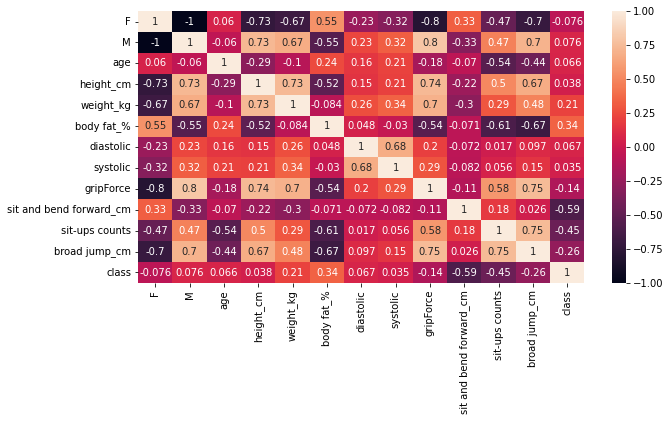

In [7]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(datafull.corr(),annot = True)

In [8]:
import numpy as np
def outdet(columns):
    q1 = np.percentile(columns,25)
    q3 = np.percentile(columns,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    roof = q3 + 1.5*iqr
    # new way to form a list
    outindex = list(columns.index[(columns < floor)|(columns > roof)])
    outvalue = list(columns[outindex])
    outlist = []
    for i in range(len(outvalue)):
        outlist.append([outindex[i],outvalue[i]])
    for i in outlist:
        if i[1] < floor:
            columns[i[0]] = floor
            # print(i[0],columns[i[0]])
        if i[1] > roof:
            columns[i[0]] = roof
            # print(i[0],columns[i[0]])

In [9]:
for _,i in datafull.iteritems():
    if _ != "F" and _ !="M" and _ != "class":
        outdet(i)

<ipython-input-8-21090eb834e1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[i[0]] = floor
<ipython-input-8-21090eb834e1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[i[0]] = roof


In [10]:
datafull.describe()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,0.367804,0.632196,36.775106,168.562600,67.405837,23.220386,78.807788,130.235907,36.964090,15.340295,39.771224,190.231210,2.500187
std,0.482226,0.482226,13.625639,8.416323,11.803487,7.190384,10.618879,14.565755,10.624133,7.688780,14.276698,39.505008,1.118109
min,0.000000,0.000000,21.000000,143.800000,32.550000,3.000000,48.500000,88.500000,0.950000,-3.800000,0.000000,73.500000,1.000000
25%,0.000000,0.000000,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,2.000000
50%,0.000000,1.000000,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,3.000000
75%,1.000000,1.000000,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,4.000000
max,1.000000,1.000000,64.000000,193.400000,100.950000,43.000000,108.500000,172.500000,70.500000,35.400000,80.000000,303.000000,4.000000


<AxesSubplot:>

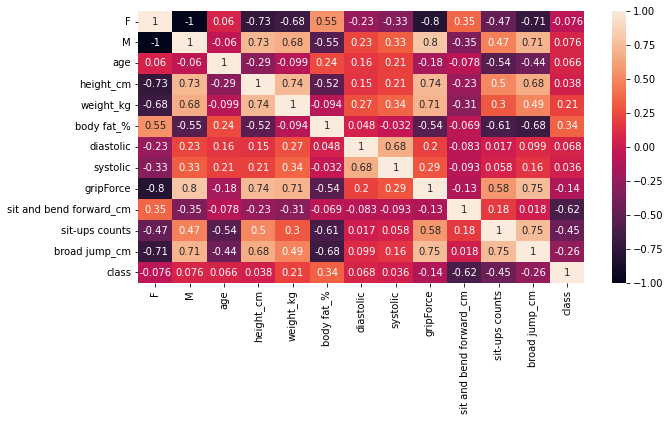

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(datafull.corr(),annot = True)

In [ ]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(data_std,data[['class']].replace(['A','B','C','D'],[1,2,3,4])\
                                                 ,test_size=0.3,random_state=100)

In [ ]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(x_train,y_train)
print('train:',lr.score(x_train,y_train))
print('test:',lr.score(x_test,y_test))